In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Book1.csv")
df.head()

,Invoice Date,Capacity Rating,Energy Rating,Invoice Quantity,Sales Zone,Sales Location,Sales Channel,Sales Margin
0,4/5/2024,1.5,3,1,East,PTA,General Trade,15%
1,4/5/2024,1.5,3,150,South,HBI,General Trade,15%
2,4/5/2024,1.5,3,90,South,KCI,General Trade,15%
3,4/5/2024,1.5,3,84,South,KCI,General Trade,15%
4,4/6/2024,1.5,3,120,North,JPR,General Trade,15%


In [4]:
columns_to_drop  = ['Capacity Rating', 'Energy Rating', 'Sales Channel', 'Sales Margin']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Invoice Date,Invoice Quantity,Sales Zone,Sales Location
0,4/5/2024,1,East,PTA
1,4/5/2024,150,South,HBI
2,4/5/2024,90,South,KCI
3,4/5/2024,84,South,KCI
4,4/6/2024,120,North,JPR


In [5]:
df.to_csv("ac_data.csv", index=False)

In [11]:
import pandas as pd
import glob
import os

# Directory containing your weather data files
weather_data_dir = '../weather_data'  # Update this path

# Pattern to match all CSV files in the directory
csv_files = glob.glob(f"{weather_data_dir}/*.csv")

dataframes = []
for file in csv_files:
    # Extract city name from filename (e.g., 'New_Delhi.csv' -> 'New_Delhi')
    city_name = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    df['city'] = city_name  # Add city column
    dataframes.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_weather_data.csv', index=False)

In [13]:
weather_data = pd.read_csv("merged_weather_data.csv")
weather_columns_to_drop = ['Unnamed: 0', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'snowfall', 'snow_depth']
weather_data.drop(columns=weather_columns_to_drop, inplace=True)
weather_data.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,city
0,2010-01-01 00:00:00+00:00,9.048,83.77097,6.448,6.990868,0.0,0.0,1016.0,955.05570,0.0,7.952660,17.819090,95.19434,98.130020,13.320000,Bhopal
1,2010-01-01 01:00:00+00:00,8.698,85.18514,6.348,6.617842,0.0,0.0,1016.9,955.82886,0.0,7.952660,17.462784,95.19434,98.297066,12.959999,Bhopal
2,2010-01-01 02:00:00+00:00,8.448,86.93715,6.398,6.529211,0.0,0.0,1017.5,956.34060,0.0,6.924738,17.163355,98.97255,99.659830,12.959999,Bhopal
3,2010-01-01 03:00:00+00:00,11.848,81.03490,8.698,10.346947,0.0,0.0,1018.7,958.17255,0.0,7.952660,15.986595,95.19434,97.765080,15.480000,Bhopal
4,2010-01-01 04:00:00+00:00,16.248,58.89934,8.198,14.568434,0.0,0.0,1019.3,959.62506,0.0,8.280000,11.525623,90.00000,91.789870,18.000000,Bhopal


In [14]:
# Convert the 'date' column to datetime objects
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Format the 'date' column to 'YYYY-MM-DD'
weather_data['date'] = weather_data['date'].dt.strftime('%Y-%m-%d')

In [15]:
weather_data.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,city
0,2010-01-01,9.048,83.77097,6.448,6.990868,0.0,0.0,1016.0,955.05570,0.0,7.952660,17.819090,95.19434,98.130020,13.320000,Bhopal
1,2010-01-01,8.698,85.18514,6.348,6.617842,0.0,0.0,1016.9,955.82886,0.0,7.952660,17.462784,95.19434,98.297066,12.959999,Bhopal
2,2010-01-01,8.448,86.93715,6.398,6.529211,0.0,0.0,1017.5,956.34060,0.0,6.924738,17.163355,98.97255,99.659830,12.959999,Bhopal
3,2010-01-01,11.848,81.03490,8.698,10.346947,0.0,0.0,1018.7,958.17255,0.0,7.952660,15.986595,95.19434,97.765080,15.480000,Bhopal
4,2010-01-01,16.248,58.89934,8.198,14.568434,0.0,0.0,1019.3,959.62506,0.0,8.280000,11.525623,90.00000,91.789870,18.000000,Bhopal


In [16]:
weather_data.to_csv("cleaned_weather_data.csv", index=False)

In [17]:
sales_data = pd.read_csv("ac_data.csv")
sales_data.head()

,Invoice Date,Invoice Quantity,Sales Zone,Sales Location
0,4/5/2024,1,East,PTA
1,4/5/2024,150,South,HBI
2,4/5/2024,90,South,KCI
3,4/5/2024,84,South,KCI
4,4/6/2024,120,North,JPR


In [19]:
# Convert the 'date' column to datetime objects
sales_data['Invoice Date'] = pd.to_datetime(sales_data['Invoice Date'])

# Format the 'date' column to 'YYYY-MM-DD'
sales_data['Invoice Date'] = sales_data['Invoice Date'].dt.strftime('%Y-%m-%d')

sales_data.head()

,Invoice Date,Invoice Quantity,Sales Zone,Sales Location
0,2024-04-05,1,East,PTA
1,2024-04-05,150,South,HBI
2,2024-04-05,90,South,KCI
3,2024-04-05,84,South,KCI
4,2024-04-06,120,North,JPR


In [20]:
sales_data.to_csv("sales_data.csv", index=False)

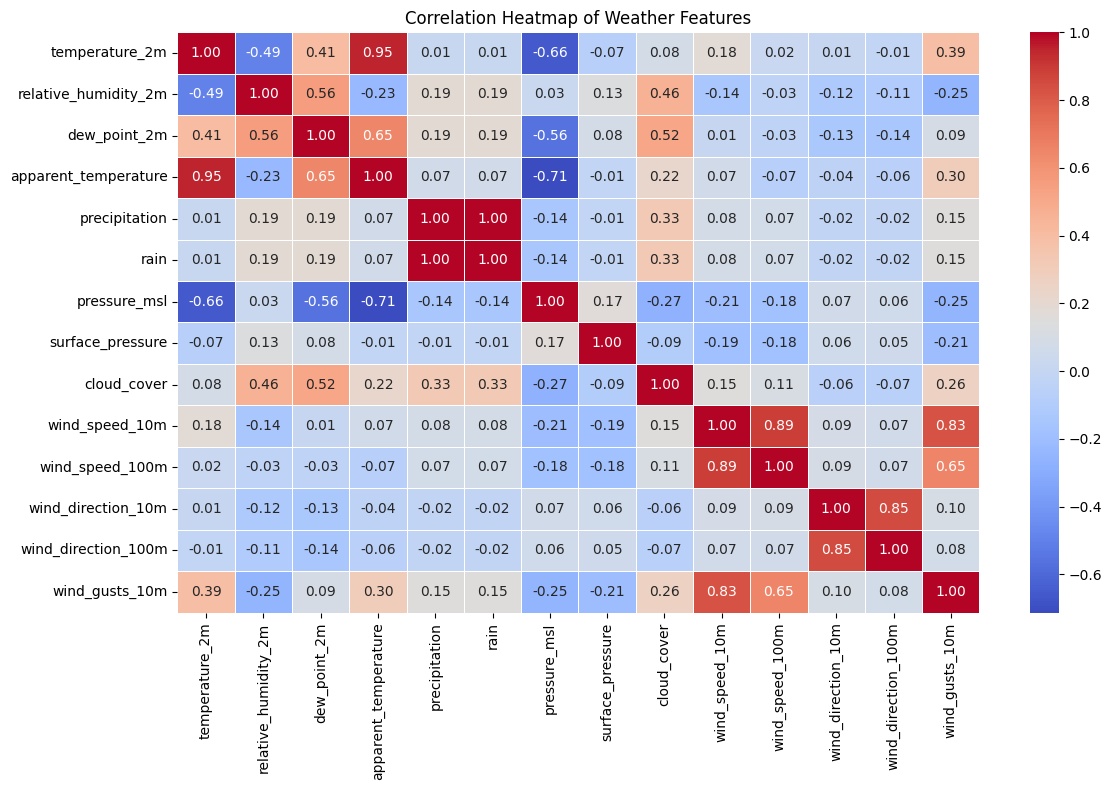

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_data = pd.read_csv("cleaned_weather_data.csv")
corr_matrix = weather_data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # This prints the correlation value in each cell
    cmap='coolwarm',
    fmt=".2f",            # Format to 2 decimal places
    linewidths=0.5
)
plt.title("Correlation Heatmap of Weather Features")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

weather_data = pd.read_csv("cleaned_weather_data.csv")
corr_matrix = weather_data.corr(numeric_only=True)

# Print the correlation matrix as text, rounded to 2 decimal places
print(corr_matrix.round(2).to_string())

                      temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  precipitation  rain  pressure_msl  surface_pressure  cloud_cover  wind_speed_10m  wind_speed_100m  wind_direction_10m  wind_direction_100m  wind_gusts_10m
temperature_2m                  1.00                 -0.49          0.41                  0.95           0.01  0.01         -0.66             -0.07         0.08            0.18             0.02                0.01                -0.01            0.39
relative_humidity_2m           -0.49                  1.00          0.56                 -0.23           0.19  0.19          0.03              0.13         0.46           -0.14            -0.03               -0.12                -0.11           -0.25
dew_point_2m                    0.41                  0.56          1.00                  0.65           0.19  0.19         -0.56              0.08         0.52            0.01            -0.03               -0.13                -0.14            0

In [26]:
weather_data.head()
weather_data.drop(columns=['rain'], inplace=True)
weather_data.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,city
0,2010-01-01,9.048,83.77097,6.448,0.0,1016.0,955.05570,0.0,7.952660,95.19434,Bhopal
1,2010-01-01,8.698,85.18514,6.348,0.0,1016.9,955.82886,0.0,7.952660,95.19434,Bhopal
2,2010-01-01,8.448,86.93715,6.398,0.0,1017.5,956.34060,0.0,6.924738,98.97255,Bhopal
3,2010-01-01,11.848,81.03490,8.698,0.0,1018.7,958.17255,0.0,7.952660,95.19434,Bhopal
4,2010-01-01,16.248,58.89934,8.198,0.0,1019.3,959.62506,0.0,8.280000,90.00000,Bhopal


In [ ]:
city_mapping = {
    "BHP": "Bhopal", "DGP": "Durgapur", "DLI": "New Delhi", "GRN": "Gurgaon",
    "GZB": "Ghaziabad", "HBI": "Hubli", "JMU": "Jammu", "JPR": "Jaipur",
    "KCI": "Kochi", "LKW": "Lucknow", "MDI": "Madurai", "PNE": "Pune",
    "PTA": "Patna"
}